In [1]:
# Import dependencies
import random
import numpy as np
import torch
import torch.nn as nn

# You can find Alfredo's plotting code in plot_lib.py in this directory .
# Download it along with this assignment and keep it in the same directory.
from plot_lib import *

from matplotlib.pyplot import plot, title, axis

In [2]:
# Set up your device
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# 1. Full, slice, fill
Write a function `warm_up` that returns the 2D tensor with integers below. **Do not use any loops**.

```
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
```


Hint: Use `torch.full`, `torch.fill_`, and the slicing operator.

In [4]:
import torch


def warm_up():
    # Create a 13x13 tensor filled with ones
    tensor = torch.full((13, 13), 1)
    # Set the second column to 2
    tensor[:, 1] = 2
    # Set the last column to 2
    tensor[:, -2] = 2
    # Set the second row to 2
    tensor[1, :] = 2
    # Set the 7th row to 2
    tensor[6, :] = 2
    # Set the 12th row to 2
    tensor[11, :] = 2
    # Fill specific blocks with 3
    tensor[3:5, 3:5] = 3
    tensor[3:5, 9:11] = 3
    tensor[8:10, 3:5] = 3
    tensor[8:10, 9:11] = 3
    return tensor


# Uncomment line below once you implement this function.
print(warm_up())

tensor([[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 1, 1, 1, 3, 3, 2, 1],
        [1, 2, 1, 3, 3, 1, 1, 1, 1, 3, 3, 2, 1],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 1, 1, 1, 3, 3, 2, 1],
        [1, 2, 1, 3, 3, 1, 1, 1, 1, 3, 3, 2, 1],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]])


# 2. To Loop or not to loop

The motivation for the following three sub-questions is to get you to think critically about how to write your deep learning code. These sorts of choices can make the difference between tractable and intractable model training.

## 2.1. `mul_row_loop`
Write a function `mul_row_loop`, using python loops with simple indexing but no advanced indexing/slicing, that receives a 2D tensor as input and returns a tensor of same size that is 
- equal to the input on the first row
- 2 times the input's second row on the second row
- 3 times the input's third row on the third row
- etc..

For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

In [5]:
def mul_row_loop(input_tensor):
    output_tensor = torch.clone(input_tensor)
    row, _ = output_tensor.size()
    for i in range(row):
        output_tensor[i] = input_tensor[i]*(i+1)
    return output_tensor


t = torch.full((4, 8), 2.0)
print(mul_row_loop(t))

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])


# 2.2. `mul_row_fast`
Write a second version of the same function named `mul_row_fast` which uses tensor operations and no looping.

**Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

In [6]:
def mul_row_fast(input_tensor):
    output_tensor = torch.clone(input_tensor)
    row,clm = output_tensor.size()

    row_tensor = torch.arange(row)+1
    row_tensor = row_tensor.view((-1,1))

    # output_tensor = input_tensor * row_tensor
    output_tensor = torch.mul(input_tensor,row_tensor)
    
    return output_tensor

t = torch.full((4, 8), 2.0)
print(mul_row_fast(t))

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])


# 2.3. `times`
Write a function `times` which takes a 2D tensor as input and returns the run times of `mul_row_loop` and `mul_row_fast` on this tensor, respectively. Use `time.perf_counter`.

Use `torch.ones` to create a 2D tensor of size (1000, 400) full of ones and run `times` on it (there should be more than two orders of magnitude difference).

In [7]:
from time import perf_counter
def times(input_tensor):
    time_1,time_2 = 0,0
    start = perf_counter()
    mul_row_loop(input_tensor)
    end = perf_counter()
    time_1 = end - start
    start = perf_counter()
    mul_row_fast(input_tensor)
    end = perf_counter()
    time_2 = end - start

    return time_1,time_2

# Uncomment lines below once you implement this function. 
input_tensor = torch.ones(1000,400)
time_1, time_2 = times(input_tensor)
print('{}, {}'.format(time_1, time_2))

0.041722324036527425, 0.001069552032276988


# 3. Non-linearities

In this section, we explore similar concepts to Lab 1 and get comfortable initializing modules like nn.Linear and using non-linearities in PyTorch.

## 3.1. ReLU
ReLU (Rectified Linear Unit) is a non-linear activation fuction defined as:

$$y = \mathrm{max}(0,x)$$

Define a fully connected neural network `linear_fc_relu` which:
- takes 2 dimensional data as input and passes it through linear modules (`torch.nn.Linear`)
- has one hidden layer of dimension 5 
- has output dimension of 2
- has ReLu as an activation function

Create a tensor with input data $X$ of size (100, 2) using `torch.randn`. 

Following the example in https://github.com/Atcold/pytorch-Deep-Learning-Minicourse/blob/master/02-space_stretching.ipynb, visualize the output of passing `X` through the neural network `linear_fc_relu`.

You can find Alfredo's plotting code in plot_lib.py in this directory. Download it along with this assignment and keep it in the same directory.

In [8]:
# Input data
X = torch.randn((100,2))
X_num = X.numpy()

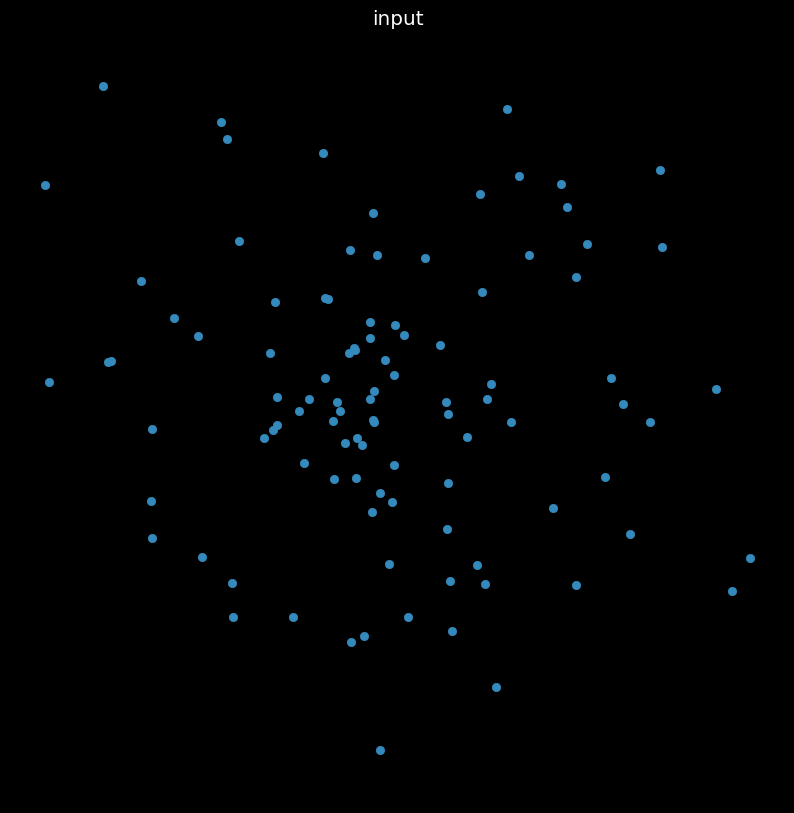

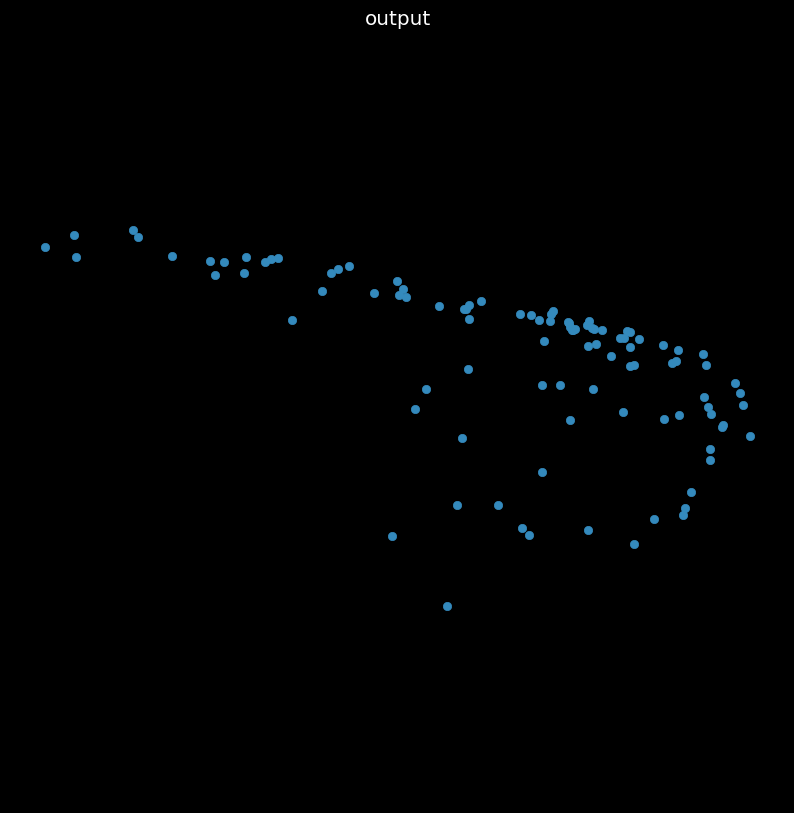

In [48]:
class LinearFCReLU(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super(LinearFCReLU,self).__init__(*args, **kwargs)
        # define my layers
        self.linear1 = nn.Linear(2,5)
        self.relu = nn.ReLU()
        self.hidden1 = nn.Linear(5,2)

    def forward(self,x):  # define forward pass
        x = self.linear1(x)
        x = self.relu(x)
        x = self.hidden1(x)
        return x

# create 1-layer neural networks with ReLU activation
linear_fc_relu = LinearFCReLU()
output = linear_fc_relu(X)
output_num = output.detach().numpy()

# Visualize: TODO
set_default()
def show_scatterplot(X, title=''):

    plt.figure()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1])
    # plt.grid(True)
    plt.title(title)
    plt.axis('off')
show_scatterplot(X_num,title="input")
show_scatterplot(output_num,title="output")

## 3.2. Sigmoid
The sigmoid function is another popular choice for a non-linear activation function which maps its input to values in the interval $(0,1)$. It is formally defined as:

$$\sigma(x) = \frac{1}{1+ exp[-x]}$$

Define a new neural network `linear_fc_sigmoid` which is the same architecture as in part `3.1.` but with a sigmoid unit instead of ReLU. 

Using the same $X$ as in part `3.1`, visualize the output of passing `X` through the neural network `linear_fc_sigmoid`.

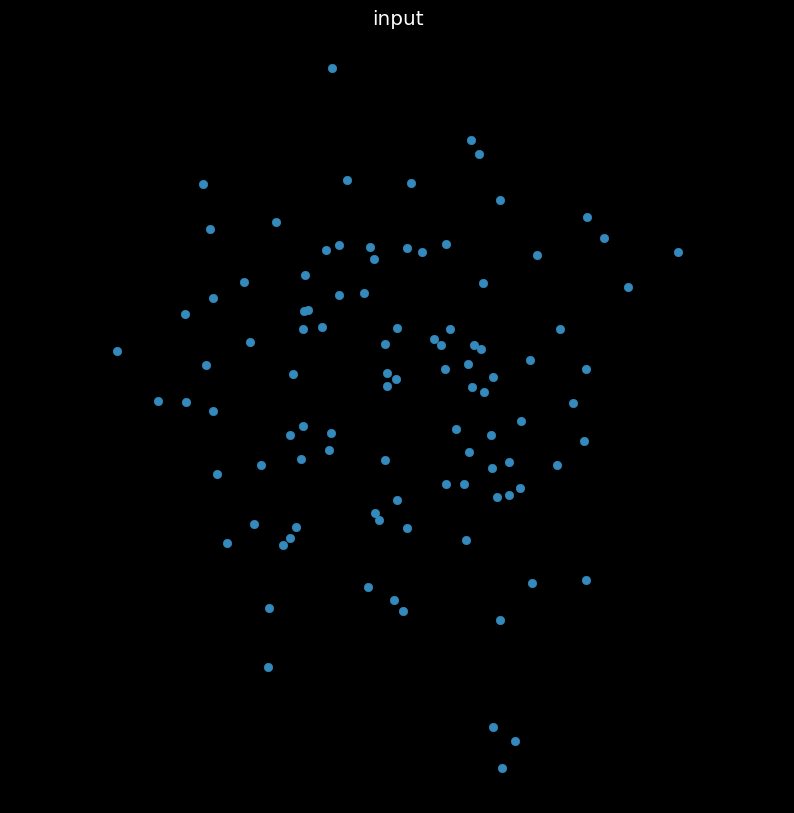

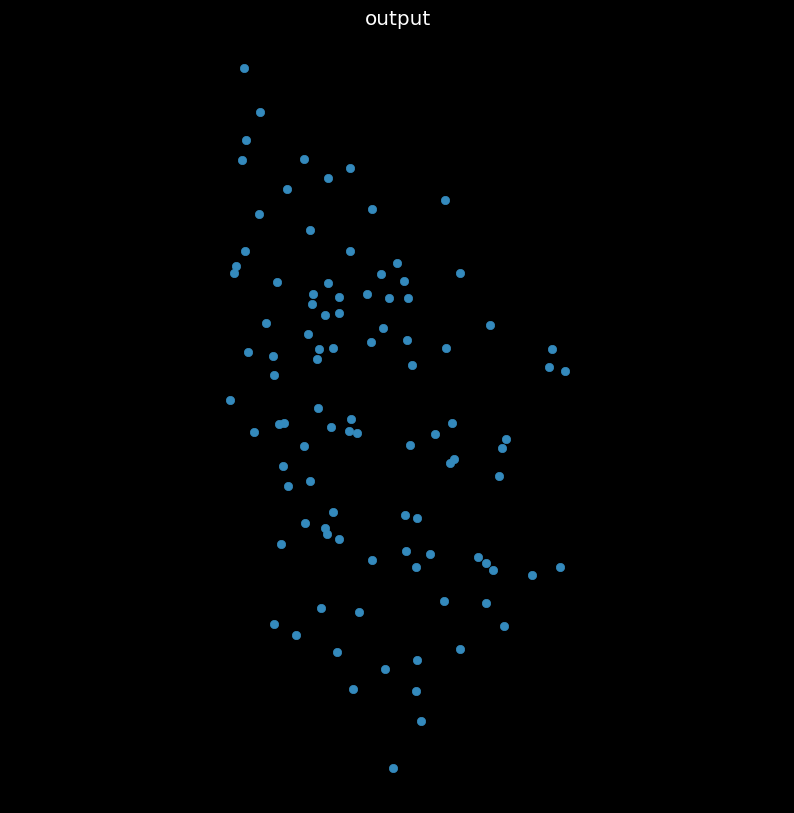

In [14]:
class linear_fc_sigmoid(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super(linear_fc_sigmoid, self).__init__(*args, **kwargs)
        self.linear1 = nn.Linear(2, 5)
        self.sigmoid1 = nn.Sigmoid()
        self.linear2 = nn.Linear(5, 2)

    def forward(self, x):
        x = self.linear1(x)
        x = self.sigmoid1(x)
        x = self.linear2(x)
        return x


mymodel = linear_fc_sigmoid()
output = mymodel(X)
output_num = output.detach().numpy()

# Visualize: TODO
set_default()


def show_scatterplot(X, title=''):

    plt.figure()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1])
    # plt.grid(True)
    plt.title(title)
    plt.axis('off')


show_scatterplot(X_num, title="input")
show_scatterplot(output_num, title="output")